<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/MBA_and_Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline

In [71]:
from google.colab import files
uploaded = files.upload()

Saving Retail_Dataset.xlsx to Retail_Dataset (1).xlsx


In [72]:
df = pd.read_excel("Retail_Dataset.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"]) #reading the excel file

In [73]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [74]:
df1.shape, df2.shape #checking for the shape of data

((525461, 8), (541910, 8))

In [75]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [76]:
sales = df1.append(df2) #combining the data

In [77]:
sales.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [78]:
len(sales.index)

1067371

In [79]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [80]:
sales.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     243007
Country             0
dtype: int64

In [81]:
# first drop the rows where the description is null
sales.dropna(axis = 0, subset = ["Description"], inplace = True)

In [82]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

sales.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [83]:
sales.isnull().sum() #Now's there is no null values available in our data

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [84]:
sales.describe()

,Quantity,Price,CustomerID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [85]:
nosales = sales[sales["Quantity"] < 0]
print ("Length of data with negative quantity: " + str(len(nosales.index)))
nosales.head()

Length of data with negative quantity: 18744


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [86]:
noprice = sales[sales["Price"] < 0]
print ("Length of data with negative price: " + str(len(noprice.index)))
print (noprice)

Length of data with negative price: 0
Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, CustomerID, Country]
Index: []


In [87]:
frames = [noprice, nosales]
result = pd.concat(frames)

newsales = sales[~sales["Invoice"].isin(result["Invoice"])]

In [88]:
sales[sales.index.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,580632,23309,SET OF 60 I LOVE LONDON CAKE CASES,3,2011-12-05 12:16:00,0.55,16360.0,United Kingdom
525457,580632,22835,HOT WATER BOTTLE I AM SO POORLY,1,2011-12-05 12:16:00,4.95,16360.0,United Kingdom
525458,580632,22114,HOT WATER BOTTLE TEA AND SYMPATHY,1,2011-12-05 12:16:00,4.25,16360.0,United Kingdom
525459,580632,22530,MAGIC DRAWING SLATE DOLLY GIRL,1,2011-12-05 12:16:00,0.42,16360.0,United Kingdom


In [89]:
sales = sales[~sales.index.duplicated()]

In [90]:
nocusID = newsales[sales["CustomerID"].isnull()]
len(nocusID.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [91]:
noPN = newsales[newsales["Description"].isnull()]
len(noPN.index)

0

In [92]:
listPN = noPN["StockCode"].tolist()
len(newsales[newsales["StockCode"].isin(listPN)].index)

0

In [93]:
noPN.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country


In [94]:
noID_PN = newsales[newsales["CustomerID"].isnull() & newsales["Description"].isnull()]
len(noID_PN.index)

0

In [95]:
#Removing observations with no product names
newsales = newsales[~newsales["Description"].isnull()]
len(newsales.index)

805620

In [96]:
zeroUnitP = newsales[newsales["Price"] == 0]
len(zeroUnitP.index)

71

In [97]:
newsales = newsales[~(newsales["Price"] == 0)]

**Exploratory Data Analysis**

EDA helps in getting to know your data better. The following section explores different aspects of the data and aims to make deductions about customer purchases.

First aspect explored is which item had the most quantity of item sold. As seen below the top 5 items in this category have been plotted with "Paper Craft, Little Birdie" bring the most popular.

In [98]:
mostsoldprod = newsales.groupby(["StockCode", "Description"])["Quantity"].sum().reset_index().sort_values("Quantity", ascending = False)

mostsoldprod.reset_index(level = 0, inplace=True)
del mostsoldprod["index"]

mostsoldprod.head(10)

,StockCode,Description,Quantity
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,93640
2,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
3,84879,ASSORTED COLOUR BIRD ORNAMENT,79913
4,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
5,85099B,JUMBO BAG RED RETROSPOT,75759
6,17003,BROCADE RING PURSE,71129
7,21977,PACK OF 60 PINK PAISLEY CAKE CASES,55270
8,84991,60 TEATIME FAIRY CAKE CASES,53495
9,21212,PACK OF 72 RETROSPOT CAKE CASES,46107


Text(0.5, 1.0, 'Most Quantities of Items Sold')

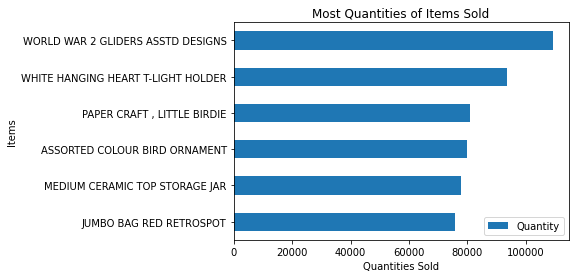

In [99]:
top5 = mostsoldprod.loc[0:5,["Description", "Quantity"]].sort_values("Quantity", ascending = True)
top5

top5.plot(kind = "barh", x = "Description", align = "center")
plt.ylabel('Items')
plt.xlabel('Quantities Sold')
plt.title('Most Quantities of Items Sold')

In [100]:
newsales["NetSales"] = newsales["Quantity"] * newsales["Price"]

In [101]:
highgrossprod = newsales.groupby(["StockCode","Description"])["NetSales"].sum().sort_values(ascending = False)
highgrossprod.head(5)

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              286486.30
85123A     WHITE HANGING HEART T-LIGHT HOLDER    252072.46
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
M          Manual                                152340.57
85099B     JUMBO BAG RED RETROSPOT               136980.08
Name: NetSales, dtype: float64

Text(0.5, 1.0, 'Most Sold Products')

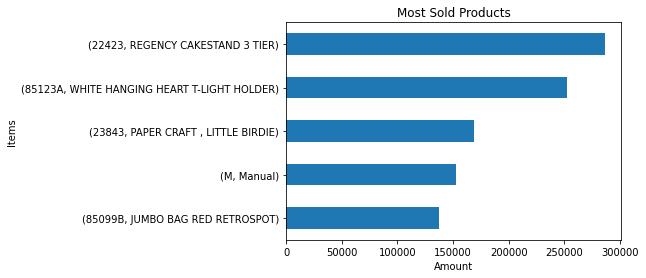

In [102]:
top5gros = highgrossprod[:5,].sort_values(ascending = True)

top5gros.plot(kind = "barh", x = "Description", align = "center")
plt.ylabel('Items')
plt.xlabel('Amount')
plt.title('Most Sold Products')

In [103]:
freqprod = newsales.groupby(["StockCode", "Description"])["Description"].count().sort_values(axis = 0,
                                                                                             ascending = 
                                                                                             False)
freqprod.head(5)

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    5181
22423      REGENCY CAKESTAND 3 TIER              3428
84879      ASSORTED COLOUR BIRD ORNAMENT         2777
85099B     JUMBO BAG RED RETROSPOT               2702
21034      REX CASH+CARRY JUMBO SHOPPER          2141
Name: Description, dtype: int64

Text(0.5, 1.0, 'Most Frequently Sold Products')

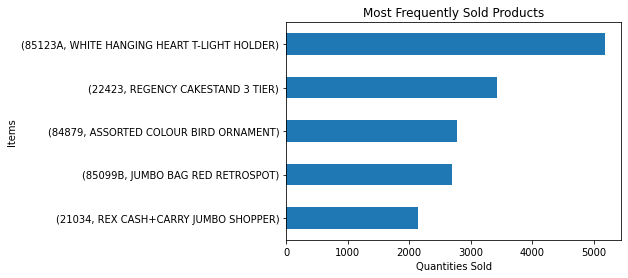

In [104]:
top5freq = freqprod[:5,].sort_values(ascending = True)

top5freq.plot(kind = "barh")
plt.ylabel('Items')
plt.xlabel('Quantities Sold')
plt.title('Most Frequently Sold Products')

In [105]:
newsales["InvoiceDate"] = pd.to_datetime(newsales["InvoiceDate"])

In [106]:
newsales["Hour"] = newsales["InvoiceDate"].dt.hour
newsales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,NetSales,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,7


In [107]:
salesbyhour = newsales.groupby(["Hour"])["Invoice"].count()

Text(0.5, 1.0, 'Transaction throughout the day')

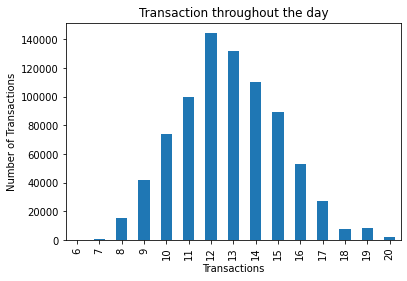

In [108]:
salesbyhour.plot(kind = "bar", x = "Invoice")
plt.xlabel("Transactions")
plt.ylabel("Number of Transactions")
plt.title("Transaction throughout the day")

In [109]:
salesbyweek = newsales.groupby(["StockCode", 
                                pd.Grouper(key = "InvoiceDate", 
                                           freq = "W-MON")])["Quantity"].sum().reset_index().sort_values("Quantity", 
                                                                                                         ascending = False)

In [110]:
newsales['Weekday'] = newsales['InvoiceDate'].dt.weekday
newsales["Weekday"] = newsales["Weekday"].astype('O')
newsales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,NetSales,Hour,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,7,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,7,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,7,1


Text(0.5, 1.0, '')

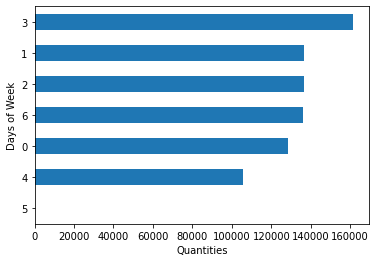

In [111]:
wd = newsales.groupby(['Weekday'])['Invoice'].count().sort_values(ascending = True)

wd.plot(kind = "barh")
plt.xlabel("Quantities")
plt.ylabel("Days of Week")
plt.title("")

In [112]:
print (newsales["InvoiceDate"].min())
print (newsales["InvoiceDate"].max())

2009-12-01 07:45:00
2011-12-09 12:50:00


In [113]:
newsales['Month'] = newsales['InvoiceDate'].dt.strftime('%b')
newsales["Month"] = newsales["Month"].astype('O')

m = newsales.groupby(['Month'])['Invoice'].count().sort_values(ascending = True)

m.head()

Month
Jan    43004
Feb    43294
Apr    49877
Aug    53399
Jul    53857
Name: Invoice, dtype: int64

Text(0.5, 1.0, 'Months with Most Quantities')

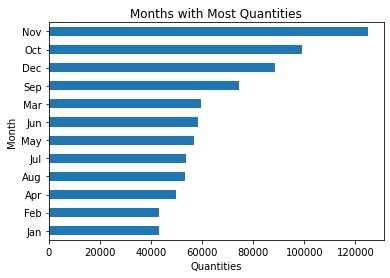

In [114]:
m.plot(kind = "barh")
plt.xlabel("Quantities")
plt.ylabel("Month")
plt.title("Months with Most Quantities")


Market Basket Analysis Using Association Analysis **bold text**

In [115]:
basket = (newsales.groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [116]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

In [118]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.025237,0.028564,0.020098,0.796356,27.879242,0.019377,4.770260
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028564,0.025237,0.020098,0.703598,27.879242,0.019377,3.288656
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.047148,0.048121,0.023506,0.498566,10.360582,0.021237,1.898312
3,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.048121,0.047148,0.023506,0.488477,10.360582,0.021237,1.862774
4,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.040169,0.049528,0.021261,0.529293,10.686745,0.019272,2.019243


In [119]:
rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


**Coocurence Matrix**

In [120]:
CID_PN_matrix = newsales.pivot_table(index = ["CustomerID"], columns = ["Description"], 
                              values = "Quantity").fillna(0)

basket_set = CID_PN_matrix.applymap(encode_units)

basket_sets_int = basket_set.astype(int)

coocM = basket_sets_int.T.dot(basket_sets_int)

In [121]:
x = pd.DataFrame(coocM.idxmax()).reset_index()
x.columns = ["A", "B"]

r = x[x["A"] != x["B"]]
r.head(10)

,A,B
15,I LOVE LONDON MINI RUCKSACK,3 STRIPEY MICE FELTCRAFT
32,TOADSTOOL BEDSIDE LIGHT,RED SPOT GIFT BAG LARGE
38,11 PC CERAMIC TEA SET POLKADOT,FLAMINGO LIGHTS
62,16 PC CUTLERY SET PANTRY DESIGN,50'S CHRISTMAS GIFT BAG LARGE
145,6 HOOK JEWEL STAND LILAC DRESS,3 STRIPEY MICE FELTCRAFT
176,"ACRYLIC BEAD CHAIN, BLUE",IVORY PAPER CUP CAKE CASES
177,"ACRYLIC BEAD CHAIN, PINK",IVORY PAPER CUP CAKE CASES
182,"ACRYLIC JEWEL ANGEL,BLUE",SET 2 TEA TOWELS I LOVE LONDON
209,AMBER BERTIE GLASS BEAD BAG CHARM,3 STRIPEY MICE FELTCRAFT
213,AMBER CRYSTAL DROP EARRINGS,12 COLOURED PARTY BALLOONS


**Recommender - Item Based Collaborative Filter**

In [122]:
matrix = newsales.pivot_table(index = ["CustomerID"], columns = ["Description"], 
                              values = "Quantity")
matrix.head(10)

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
coocM.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
DOORMAT UNION JACK GUNS AND ROSES,47,6,2,3,0,0,0,0,0,1,...,0,1,2,4,0,4,1,5,0,1
3 STRIPEY MICE FELTCRAFT,6,96,0,6,2,2,0,0,1,1,...,0,2,4,5,0,7,2,7,0,0
4 PURPLE FLOCK DINNER CANDLES,2,0,40,0,0,0,0,0,0,2,...,0,1,4,4,0,4,1,7,0,2
50'S CHRISTMAS GIFT BAG LARGE,3,6,0,106,0,0,0,0,0,1,...,0,2,4,4,0,13,2,6,0,1
ANIMAL STICKERS,0,2,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
whiteHeart = matrix["WHITE HANGING HEART T-LIGHT HOLDER"]
whiteHeart.head()

CustomerID
12346.0   NaN
12347.0   NaN
12348.0   NaN
12349.0   NaN
12350.0   NaN
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

In [125]:
similarProductsW = matrix.corrwith(whiteHeart)
similarProductsW = similarProductsW.dropna()
df = pd.DataFrame(similarProductsW)
df.head(10)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
Description,
DOORMAT UNION JACK GUNS AND ROSES,0.602929
3 STRIPEY MICE FELTCRAFT,0.127785
4 PURPLE FLOCK DINNER CANDLES,0.274589
50'S CHRISTMAS GIFT BAG LARGE,0.918082
BLACK PIRATE TREASURE CHEST,-0.235452
BROWN PIRATE TREASURE CHEST,0.170117
CHERRY BLOSSOM DECORATIVE FLASK,0.832025
DOLLY GIRL BEAKER,0.977740
FLAMINGO LIGHTS,0.690134


In [126]:
similarProductsW.sort_values(ascending = False)

Description
ORIGAMI LAVENDER INCENSE IN TUBE      1.0
WHITE HANGING HEART T-LIGHT HOLDER    1.0
CANNABIS LEAF BEAD CURTAIN            1.0
DISTRESSED CANDLE STICK WHITE         1.0
BEECH WOOD PHOTO FRAME                1.0
                                     ... 
BISCUIT TIN VINTAGE LEAF             -1.0
KID'S CHALKBOARD/EASEL               -1.0
BLACK AND WHITE PAISLEY FLOWER MUG   -1.0
SPACEBOY MINI RUCKSACK               -1.0
ORANGE/FUSCHIA STONES NECKLACE       -1.0
Length: 4683, dtype: float64

In [127]:
corrMatrix = matrix.corr()
corrMatrix.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
DOORMAT UNION JACK GUNS AND ROSES,1.000000,-0.444150,NaN,-0.585206,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.471405,NaN,0.704575,NaN,-0.266167,NaN,NaN
3 STRIPEY MICE FELTCRAFT,-0.444150,1.000000,NaN,0.406838,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,0.207514,0.349442,NaN,0.311200,-1.0,0.198409,NaN,NaN
4 PURPLE FLOCK DINNER CANDLES,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.996274,0.761642,NaN,0.974094,NaN,0.798797,NaN,1.0
50'S CHRISTMAS GIFT BAG LARGE,-0.585206,0.406838,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.735087,NaN,NaN,0.572753,1.0,0.437531,NaN,NaN
ANIMAL STICKERS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
second_customer = matrix.iloc[1].dropna()
second_customer.head()

Description
10 COLOUR SPACEBOY PEN          24.000000
3 HOOK HANGER MAGIC GARDEN      12.000000
3D DOG PICTURE PLAYING CARDS    22.285714
3D SHEET OF CAT STICKERS        12.000000
3D SHEET OF DOG STICKERS        12.000000
Name: 12347.0, dtype: float64

In [129]:
simProducts = pd.Series()
#Go through every product bought by second customer
for i in range(0, len(second_customer.index)):
    print ("Adding sims for " + second_customer.index[i] + "....")
    #Retrieve similar products to the ones bought by customer 2
    sims = corrMatrix[second_customer.index[i]].dropna()
    #Scale to how many of the products were bought
    sims = sims.map(lambda x: x * second_customer[i])
    # Add to the list of similar products
    simProducts = simProducts.append(sims)

print ("sorting...")
simProducts.sort_values(inplace = True, ascending = True)
print (simProducts)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Adding sims for 10 COLOUR SPACEBOY PEN....
Adding sims for 3 HOOK HANGER MAGIC GARDEN....
Adding sims for 3D DOG PICTURE PLAYING CARDS....
Adding sims for 3D SHEET OF CAT STICKERS....
Adding sims for 3D SHEET OF DOG STICKERS....
Adding sims for 60 TEATIME FAIRY CAKE CASES....
Adding sims for 72 SWEETHEART FAIRY CAKE CASES....
Adding sims for AIRLINE BAG VINTAGE JET SET BROWN....
Adding sims for AIRLINE BAG VINTAGE JET SET RED....
Adding sims for AIRLINE BAG VINTAGE JET SET WHITE....
Adding sims for AIRLINE BAG VINTAGE TOKYO 78....
Adding sims for AIRLINE BAG VINTAGE WORLD CHAMPION ....
Adding sims for ALARM CLOCK BAKELIKE CHOCOLATE....
Adding sims for ALARM CLOCK BAKELIKE GREEN....
Adding sims for ALARM CLOCK BAKELIKE ORANGE....
Adding sims for ALARM CLOCK BAKELIKE PINK....
Adding sims for ALARM CLOCK BAKELIKE RED ....
Adding sims for BATHROOM METAL SIGN ....
Adding sims for BICYCLE PUNCTURE REPAIR KIT ....
Adding sims for BIRDCAGE DECORATION TEALIGHT HOLDER....
Adding sims for BLACK C

In [130]:
#Sorting the results and avoid repetitions
simProducts= simProducts.groupby(simProducts.index).sum().sort_values(ascending = False)

In [131]:
filteredSims = simProducts.drop(second_customer.index)
filteredSims.head(5)

TROPICAL LUGGAGE TAG                 1451.824208
HERB MARKER THYME                    1441.938514
RED RETROSPOT TISSUE BOX             1421.540907
CHARLIE+LOLA"EXTREMELY BUSY" SIGN    1408.243219
FOLDING BUTTERFLY MIRROR RED         1403.047499
dtype: float64